# Exploratory data analysis (EDA)

import all packages and modules needed

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#download data set
data  =  pd.read_csv("haberman.csv")

In [23]:
data.head()
#colums are given differnet in data set ...
#either change the column names her or can directly edit in csv file.

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [24]:
data.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [25]:
#change coloumns names
data.columns = ['age','year','node','status']

In [26]:
data.head()

,age,year,node,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# DOMAIN KNOWLEDGE .

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer
++independent or features++ 
1. age 
2. year : year at which operation happened 
3. nodes : positive axillary nodes detected
++dependent or class_label++
4. status : 1. the patient survived 5 years or longer
            2. the patient died within 5 year



In [27]:
print(data.shape) #data cointain 305 instance and 4 variables(including class)

(305, 4)


In [28]:
data['status'].value_counts()#data is absolute imbalenced

1    224
2     81
Name: status, dtype: int64

# Bivariate analysis

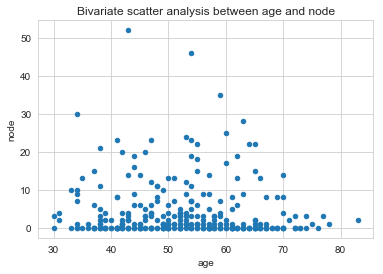

In [29]:
data.plot(kind = 'scatter',x = 'age',y = 'node');
plt.title('Bivariate scatter analysis between age and node')
plt.show() 

**Observation**
1. By the above scatter plot we cananot distinguish between class-labels '1' and '2' since they are scattered closely 

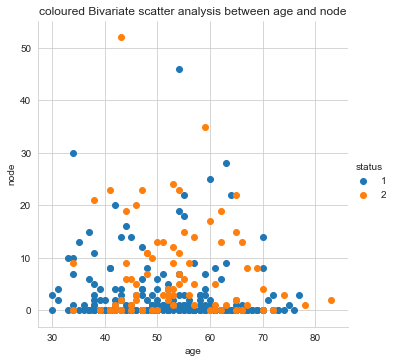

In [30]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='status',height = 5).map(plt.scatter,'age','node').add_legend();
plt.title('coloured Bivariate scatter analysis between age and node')
plt.show()

**observation**

1. The above scattered graph cannot calssify i.e cannot makes a clear 
understanding betweet class labels 1 and 2.
2. so try for pair plot to make a which ever 2 features gives us a better understanding of data.

**pairplot**

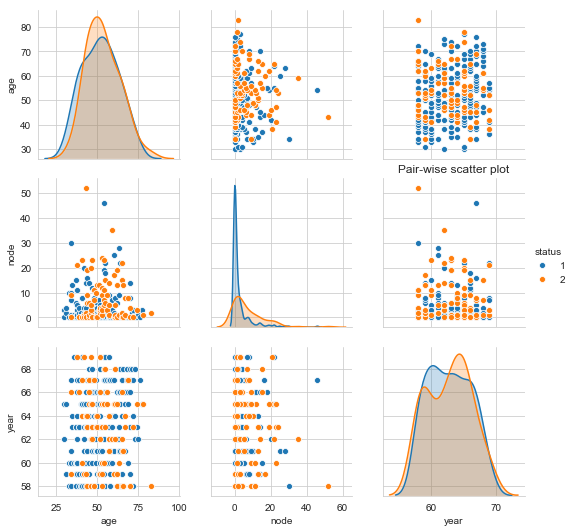

In [31]:
sns.set_style("whitegrid");
sns.pairplot(data, hue='status',vars = ['age','node','year']);
plt.title('Pair-wise scatter plot')
plt.show()

**observations**
1. The above upper diagnol graphs considering (age,year) ,(age,node) and (year,node) everything seems overlapped.lets check once by plotting in scatterd

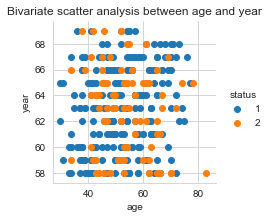

In [32]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='status').map(plt.scatter,'age','year').add_legend();
plt.title('Bivariate scatter analysis between age and year')
plt.show() #overlapped cant get any if_else 

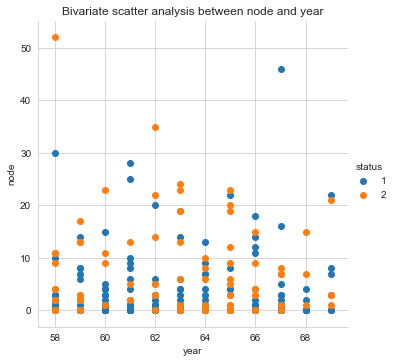

In [33]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='status',height = 5).map(plt.scatter,'year','node').add_legend();
plt.title('Bivariate scatter analysis between node and year')
plt.show() #highly overlapaped 

**observation**
1. piar features are not helping in classification between 1 and 2

# univirate Analysis

In [34]:
data_y = data.loc[data['status']==1] 

In [35]:
data_n = data.loc[data['status']==2]

**1D-Histograms**

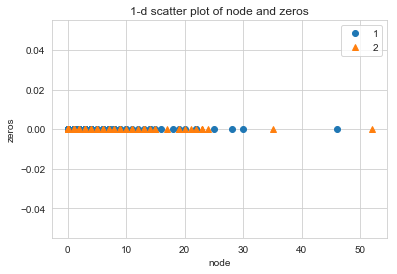

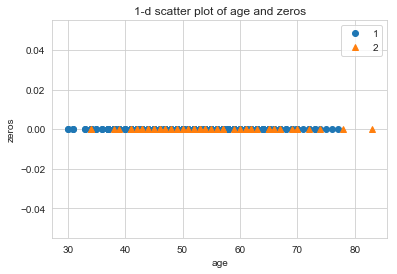

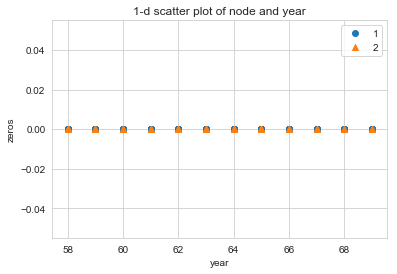

In [36]:
plt.plot(data_y['node'],np.zeros_like(data_y['node']),'o',label='1')
plt.plot(data_n['node'],np.zeros_like(data_n['node']),'^',label='2')
plt.ylabel('zeros')
plt.xlabel('node')
plt.legend()
plt.title('1-d scatter plot of node and zeros')
plt.show() 
plt.plot(data_y['age'],np.zeros_like(data_y['age']),'o',label='1')
plt.plot(data_n['age'],np.zeros_like(data_n['age']),'^',label='2')
plt.ylabel('zeros')
plt.xlabel('age')
plt.legend()
plt.title('1-d scatter plot of age and zeros')
plt.show()
plt.plot(data_y['year'],np.zeros_like(data_y['year']),'o',label='1')
plt.plot(data_n['year'],np.zeros_like(data_n['year']),'^',label='2')
plt.ylabel('zeros')
plt.xlabel('year')
plt.title('1-d scatter plot of node and year')
plt.legend()
plt.show()

**observation**
1. cant visualize and points are overlapping a lot.
2. Above graphs are confusing to analze the data upon single independent  variable lets check the pdf if it could give better undertanding 

**PDF**

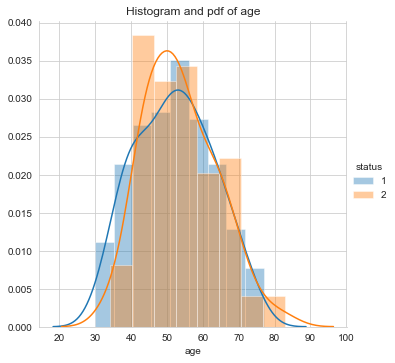

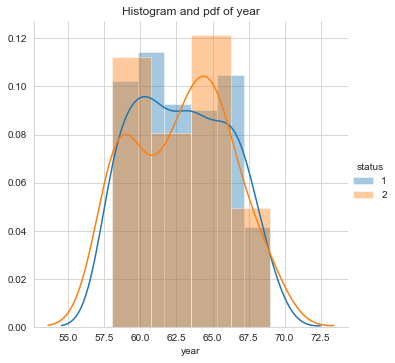

In [37]:
sns.FacetGrid(data,hue='status',height=5).map(sns.distplot,"age").add_legend();
plt.title('Histogram and pdf of age')
plt.show()

sns.FacetGrid(data,hue='status',height=5).map(sns.distplot,"year").add_legend();
plt.title('Histogram and pdf of year')
plt.show()

**observation**
1. The PDF's are overlapping a lot with respect to variables age and year

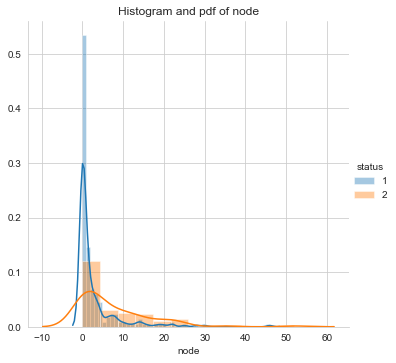

In [38]:
sns.FacetGrid(data,hue='status',height=5).map(sns.distplot,"node").add_legend();
plt.title('Histogram and pdf of node')
plt.show()

**observation**
1. the overlaping is high but not as compared to age and year


**CDF**

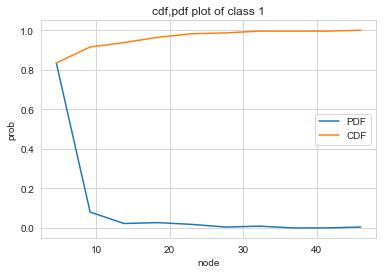

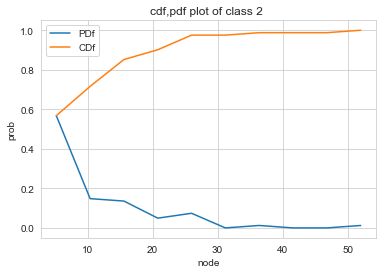

In [43]:
c, b = np.histogram(data_y['node'], bins=10, density = True)
pdf = c/sum(c)
cdf = np.cumsum(pdf)
plt.plot(b[1:],pdf,label='PDF')
plt.plot(b[1:],cdf,label='CDF')
plt.ylabel('prob')
plt.xlabel('node')
plt.legend()
plt.title('cdf,pdf plot of class 1')
plt.show()
c, b = np.histogram(data_n['node'], bins=10, density = True)
pdf = c/sum(c)
cdf = np.cumsum(pdf)
plt.plot(b[1:],pdf,label='PDf')
plt.plot(b[1:],cdf,label='CDf')
plt.ylabel('prob')
plt.xlabel('node')
plt.legend()
plt.title('cdf,pdf plot of class 2 ')
plt.show()
            
                    

**observation**
1. The CDF and PDf are not starting at zero implies that the data node cointain more zero values which understood as infinte valve by matlab

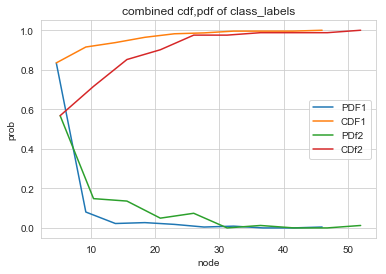

In [40]:
c, b = np.histogram(data_y['node'], bins=10, density = True)
pdf = c/sum(c)
cdf = np.cumsum(pdf)
plt.plot(b[1:],pdf,label='PDF1')
plt.plot(b[1:],cdf,label='CDF1')
c, b = np.histogram(data_n['node'], bins=10, density = True)
pdf = c/sum(c)
cdf = np.cumsum(pdf)
plt.plot(b[1:],pdf,label='PDf2')
plt.plot(b[1:],cdf,label='CDf2')
plt.ylabel('prob')
plt.xlabel('node')
plt.legend()
plt.title('combined cdf,pdf of class_labels')
plt.show()
plt.show()

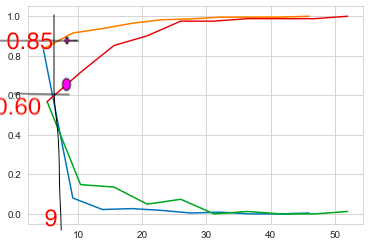

**observation**
1. since pdf is overlapping so much if we consider the first over lap
its about 9 then the status 1 may give about 88 percent correct 
and 2 may give 65 percent wrong predection

**BoxPlot**

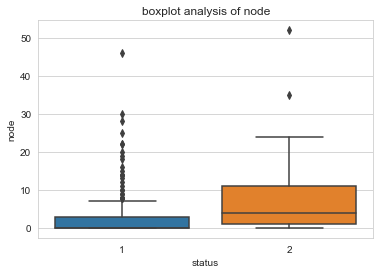

In [41]:
sns.boxplot(x='status',y='node', data=data)
plt.title('boxplot analysis of node')
plt.show()

the iqr is more in case of 2 compared to 1 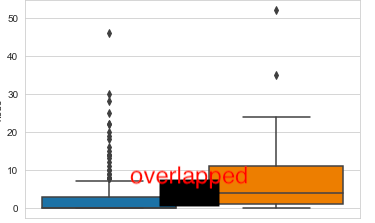

**observations**
1. The boxplot says there is a lot overlap on data.
2. if node<3 {1}  if node >3 {2} error is about 60 percent.

***Voilin Plot***

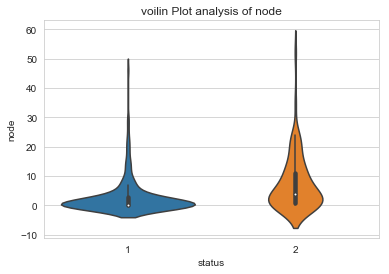

In [42]:
sns.violinplot(x="status", y="node", data= data, size=8)
plt.title('voilin Plot analysis of node')
plt.show()

**observation**
1. It is both pdf and box represetation
2. since the class label 1 violin has a largely fattened because more data is concentrated.

# Final conclusion

1. The bivariate analysis could not give any conclusions as there is much overlapping. The simple model such as if-      else could not help in clasification of class-label.
2. even univariarte analysis gives better approachability than bivariate but it is relative. The variable 'node' gives better approach than age and year as it have less overlapping compared to others but there could be other better model to clasify our class label